<a href="https://colab.research.google.com/github/LucasdosSantosDiniz/Principais-jogos-na-Google-Play-Store-2021/blob/main/Lucas_dos_Santos_Diniz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principais jogos na Google Play Store 2021**

Sobre o conjunto de dados!

Este é um conjunto de dados dos 100 melhores jogos de cada categoria de jogos na Google Play Store, juntamente com suas classificações e outros dados, como preço e número de instalações.

Dados de 9 de junho de 2021.





### **Importando as bibliotecas**



---





In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd


### **Importando o datasets**

---



In [2]:
dados = pd.read_csv("android-games.csv")

### **Informações Gerais**

---



In [3]:
dados

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False


## **GRAFICO TREEMAP - Os gêneros com maior quantidade de jogos**



In [7]:

#Buscando a quantidade de categorias existente no datasets
categorias = dados['category'].value_counts().reset_index()
categorias.columns = ['Categoria', 'Quantidade']

#Criando o grafico Treemap
fig = px.treemap(categorias, path=['Categoria'], values='Quantidade')

#Exibindo o grafico
fig.show()



### A maioria dos gênero tem uma quantidade de 100 jogos, mas o destaque positivo vai para :

* ***Game Word*** com 104 jogos
* ***Game Card*** com 126 jogos



## **GRAFICO DE BARRAS - Os 7 jogos mais avaliado no Play Store**

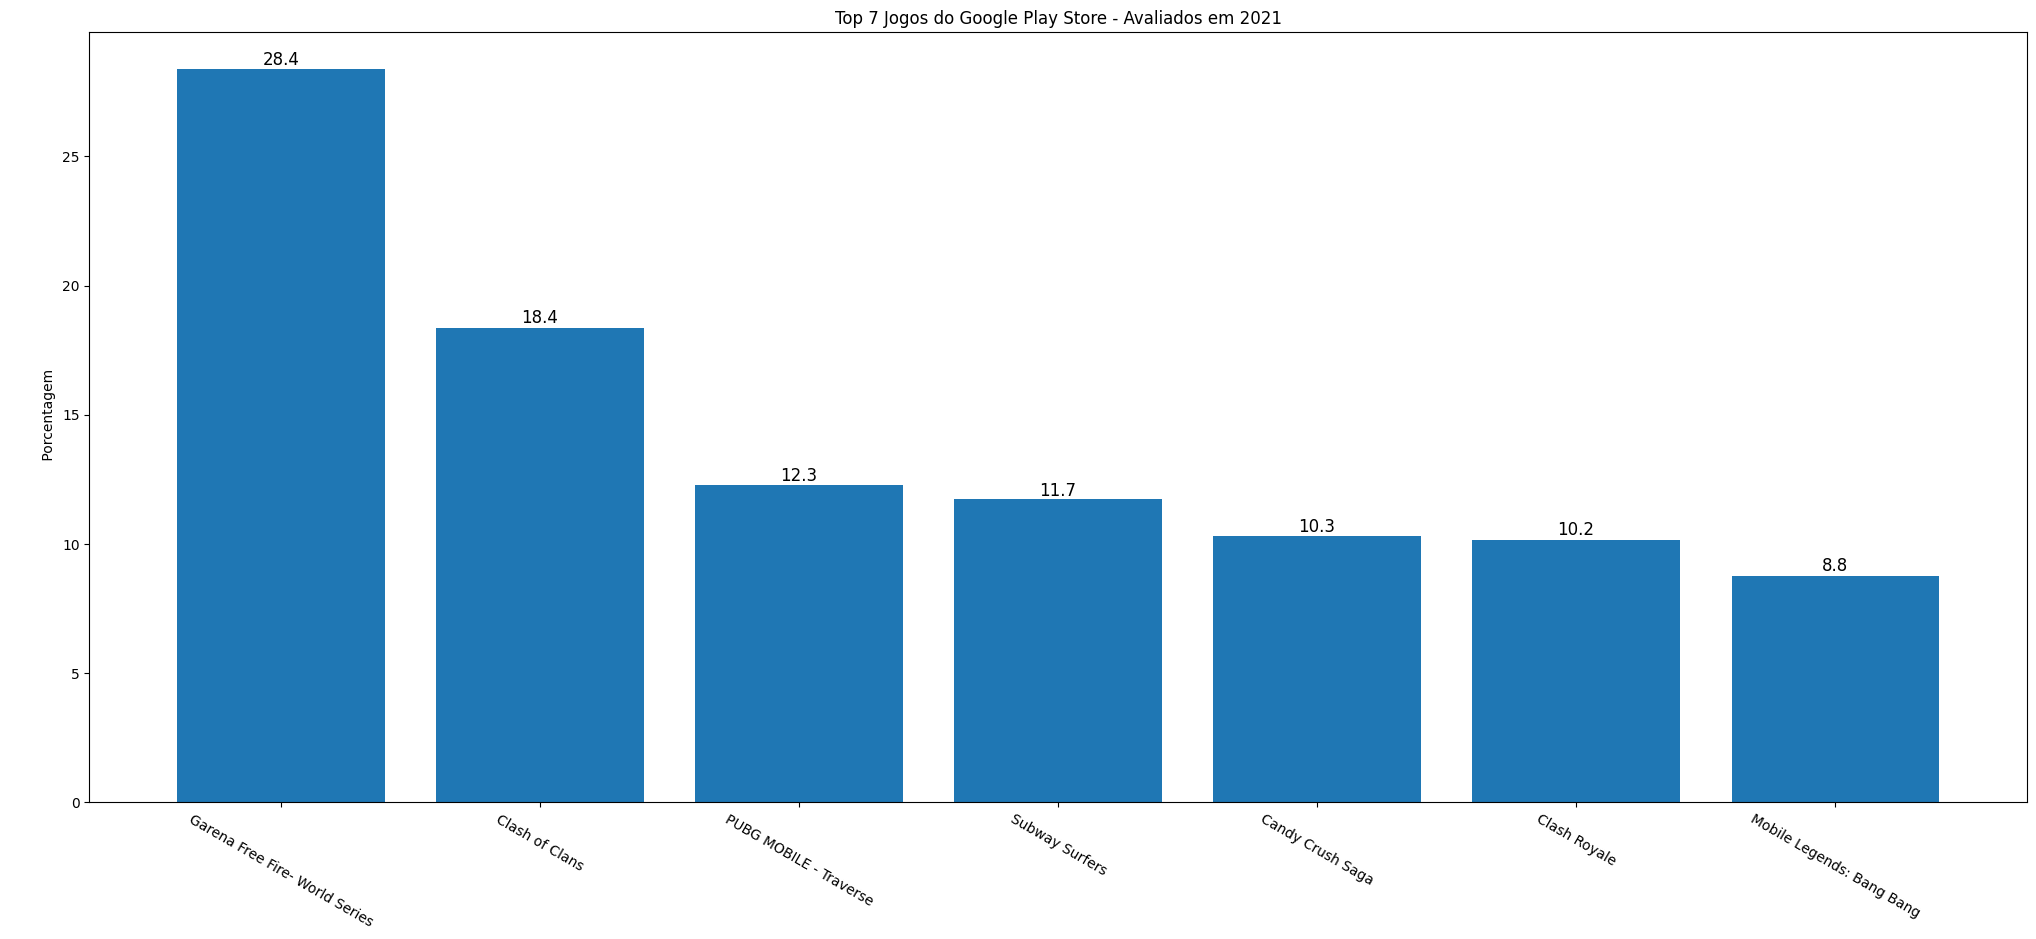

In [5]:
# Selecionar os 7 melhores jogos
jogos = dados.sort_values(by='total ratings', ascending=False)
top_7_jogos = jogos.head(7)

# Calcular a porcentagem de classificação
total_classificacoes = top_7_jogos['total ratings'].sum()
porcentagem = (top_7_jogos['total ratings'] / total_classificacoes) * 100
porcentagem_arredondada = round(porcentagem,1)

# Criar o gráfico de barras
plt.figure(figsize=(25, 10))
plt.bar(top_7_jogos['title'], porcentagem)
plt.ylabel('\n \n Porcentagem')
plt.title('Top 7 Jogos do Google Play Store - Avaliados em 2021')
plt.xticks(rotation=-30)

# Exibir o numero de procentagem dentro do grafico
for i, value in enumerate(porcentagem_arredondada):
    plt.text(i, value, str(value), ha='center', va='bottom', size='12')

# Exibir o gráfico
plt.show()

De acordo com o grafico ***Garena Free Fire- World Series*** é o jogo mais avaliado na plataforma com 28.4% .

> Os outros jogos da lista são:



*   *Clash of Clans*: 18.4 %

*   *PUBG MOBILE - Traverse*: 12.3 %

*   *Subway Surfers*: 11.7 %

*   *Candy Crush Saga*: 10.3 %

*   *Clash Royale*: 10.2 %

*   *Mobile Legends: Bang Bang*: 8.8 %










## **GRAFICO EM LINHAS - Crescimento dos 7 principais jogos de 30 e 60 dias e a média geral**

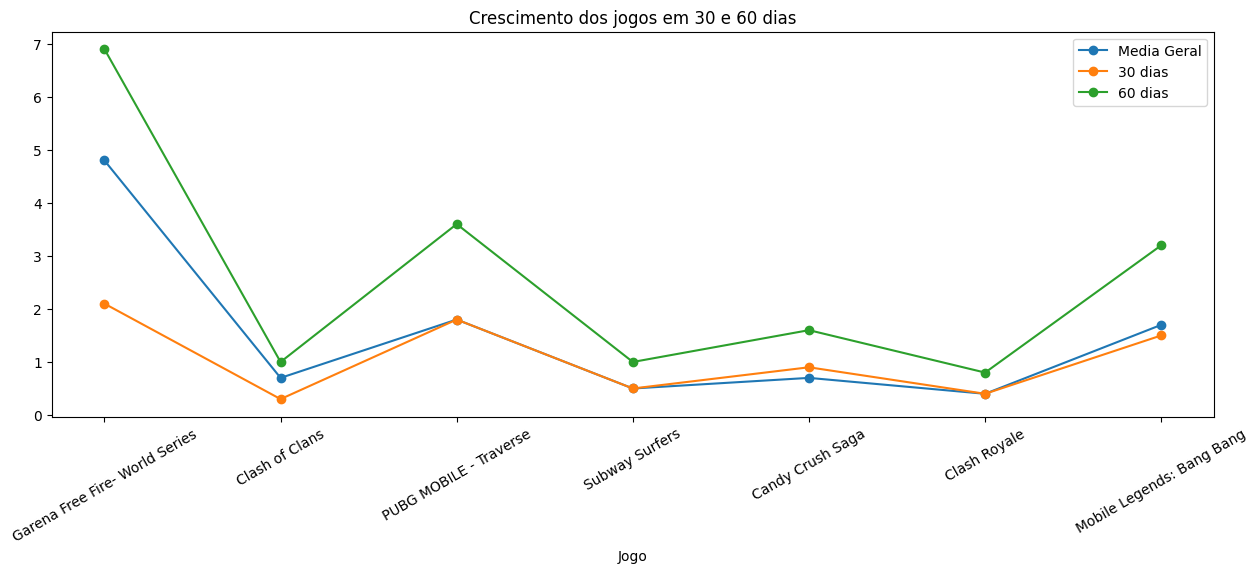

In [6]:
#Buscando a media entre o 30 dias e 60 dias
media = (top_7_jogos['growth (60 days)'] - top_7_jogos['growth (30 days)'])
media = round(media,1)

# Criando O grafico em linas
plt.figure(figsize=(15, 5))
plt.plot(top_7_jogos['title'], media, marker='o', label='Media Geral')
plt.plot(top_7_jogos['title'], top_7_jogos['growth (30 days)'], marker='o', label='30 dias')
plt.plot(top_7_jogos['title'], top_7_jogos['growth (60 days)'], marker='o', label='60 dias')
plt.xticks(rotation=30)
plt.xlabel('Jogo')
plt.title('Crescimento dos jogos em 30 e 60 dias')
plt.legend()

# Exibir o gráfico
plt.show()





### O grafico acima mostrou que o crescimedo dos jogos :



 **Em 60 dias:**



*  *Garena Free Fire* : 6.9 %

*   *Clash of Clans* : 1 %

*  *PUBG MOBILE - Traverse*: 3.6 %


*   *Subway Suferes*: 1%


*   *Candy Crush Saga:* 1.6 %


*   *Clash Royale*: 0.8 %


*   *Mobile Legends: Bang Bang* : 3.2 %



---




  **Em 30 dias:**



*  *Garena Free Fire* : 2.1 %

*   *Clash of Clans* : 0.3 %

*  *PUBG MOBILE - Traverse*: 1.8 %


*   *Subway Suferes*: 0.5 %


*   *Candy Crush Saga:* 0.9 %


*   *Clash Royale*: 0.4 %


*   *Mobile Legends: Bang Bang* : 1.5 %




---



*  **Média Geral:**



*  *Garena Free Fire* : 4.8 %

*   *Clash of Clans* : 0.7 %

*  *PUBG MOBILE - Traverse*: 1.8 %


*   *Subway Suferes*: 0.5 %


*   *Candy Crush Saga:* 0.7 %


*   *Clash Royale*: 0.4 %


*   *Mobile Legends: Bang Bang* : 1.7 %
